In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
raw_coarse = np.genfromtxt("miniboone_2d_data/coarse_angle.dat")
raw_fine = np.genfromtxt("miniboone_2d_data/fine_angle.dat")

In [3]:
data_coarse = np.array([_[0] for _ in raw_coarse])
pred_coarse = np.array([_[1] for _ in raw_coarse])

data_fine = np.array([_[0] for _ in raw_fine])
pred_fine = np.array([_[1] for _ in raw_fine])

data_coarse_dic = {}
pred_coarse_dic = {}

data_fine_dic = {}
pred_fine_dic = {}

In [4]:
coarse_bin_centers_angle = []
coarse_bin_centers_energy = []

angle_center = -0.95
energy_center = 130

for data, pred in raw_coarse:
    
    coarse_bin_centers_angle.append(angle_center)
    coarse_bin_centers_energy.append(energy_center)
    
    data_coarse_dic[(energy_center, round(angle_center, 3))] = data
    pred_coarse_dic[(energy_center, round(angle_center, 3))] = pred
    
    angle_center += 0.1
    if angle_center > 1:
        angle_center = -0.95
        energy_center += 60.


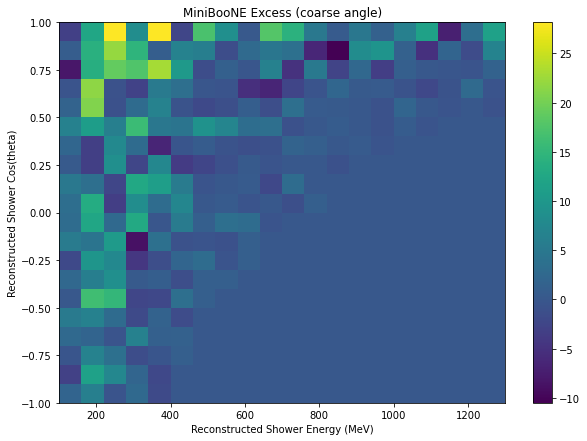

In [5]:
bins = (20, 20)
range_limits = ((100, 1300), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(coarse_bin_centers_energy, coarse_bin_centers_angle, weights=(data_coarse - pred_coarse), bins=bins, range=range_limits)
plt.colorbar()
plt.title("MiniBooNE Excess (coarse angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_coarse_2d.png", facecolor="white")

plt.show()

In [6]:
more_coarse_bin_centers_angle = []
more_coarse_bin_centers_energy = []

data_more_coarse = []
pred_more_coarse = []

angle_center = -0.9
energy_center = 160

while True:
    
    more_coarse_bin_centers_angle.append(angle_center)
    more_coarse_bin_centers_energy.append(energy_center)
    
    data_more_coarse.append(data_coarse_dic[(energy_center - 30, round(angle_center + 0.05, 3))]
                          + data_coarse_dic[(energy_center + 30, round(angle_center + 0.05, 3))]
                          + data_coarse_dic[(energy_center + 30, round(angle_center - 0.05, 3))]
                          + data_coarse_dic[(energy_center - 30, round(angle_center - 0.05, 3))])
    
    pred_more_coarse.append(pred_coarse_dic[(energy_center - 30, round(angle_center + 0.05, 3))]
                          + pred_coarse_dic[(energy_center + 30, round(angle_center + 0.05, 3))]
                          + pred_coarse_dic[(energy_center + 30, round(angle_center - 0.05, 3))]
                          + pred_coarse_dic[(energy_center - 30, round(angle_center - 0.05, 3))])    
    
    
    angle_center += 0.2
    if angle_center > 1:
        angle_center = -0.9
        energy_center += 120.
    
    if energy_center > 1300:
        break

data_more_coarse = np.array(data_more_coarse)
pred_more_coarse = np.array(pred_more_coarse)


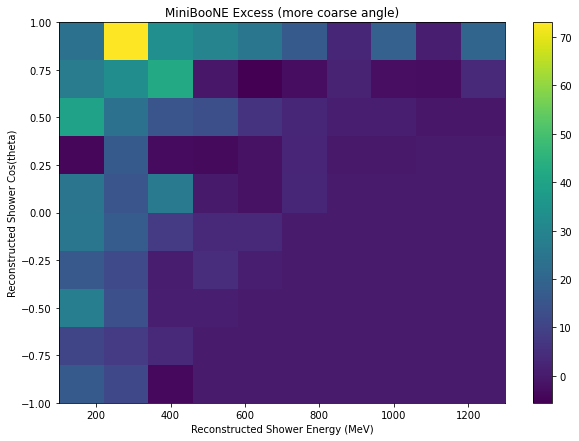

In [7]:
bins = (10, 10)
range_limits = ((100, 1300), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(more_coarse_bin_centers_energy, more_coarse_bin_centers_angle, weights=(data_more_coarse - pred_more_coarse), bins=bins, range=range_limits)
plt.colorbar()
plt.title("MiniBooNE Excess (more coarse angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_more_coarse_2d_from_other_ipynb.png", facecolor="white")
plt.show()

In [8]:
with open('more_coarse_miniboone_2d.pickle', 'wb') as handle:
    pickle.dump((more_coarse_bin_centers_energy, more_coarse_bin_centers_angle, data_more_coarse, pred_more_coarse), handle)

print("saved!")

#with open('more_coarse_miniboone_2d.pickle', 'rb') as handle:
#    more_coarse_bin_centers_energy, more_coarse_bin_centers_angle, data_more_coarse, pred_more_coarse = pickle.load(handle)

saved!


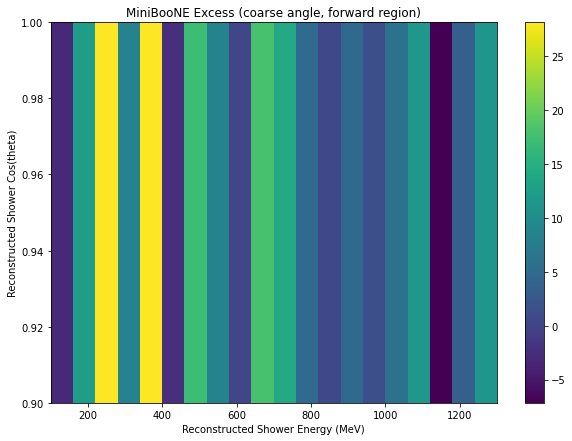

In [9]:
bins = (20, 1)
range_limits = ((100, 1300), (0.9, 1.))

plt.figure(figsize=(10,7))
plt.hist2d(coarse_bin_centers_energy, coarse_bin_centers_angle, weights=(data_coarse - pred_coarse), bins=bins, range=range_limits)
plt.colorbar()
plt.title("MiniBooNE Excess (coarse angle, forward region)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_coarse_forward.png", facecolor="white")

plt.show()

In [10]:
fine_bin_centers_angle = []
fine_bin_centers_energy = []

angle_center = 0.905
energy_center = 160

for data, pred in raw_fine:
    
    fine_bin_centers_angle.append(angle_center)
    fine_bin_centers_energy.append(energy_center)
    
    data_fine_dic[(energy_center, round(angle_center, 3))] = data
    pred_fine_dic[(energy_center, round(angle_center, 3))] = pred
    
    angle_center += 0.01
    if angle_center > 1:
        angle_center = 0.905
        energy_center += 120

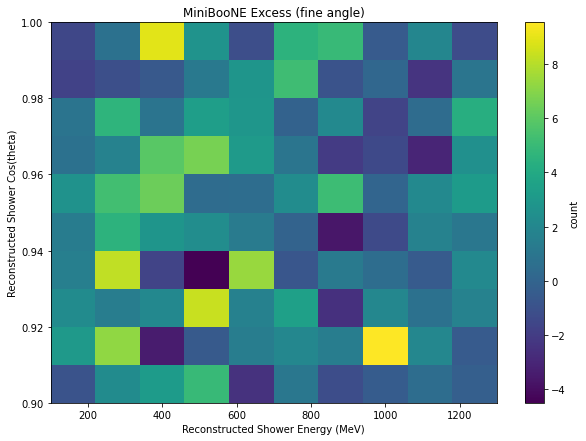

In [11]:
bins = (10, 10)
range_limits = ((100., 1300.), (0.9, 1.))

plt.figure(figsize=(10,7))
plt.hist2d(fine_bin_centers_energy, fine_bin_centers_angle, weights=(data_fine - pred_fine), bins=bins, range=range_limits)
plt.colorbar(label="count")
plt.title("MiniBooNE Excess (fine angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_fine.png", facecolor="white")

plt.show()

In [12]:
data_mixed = []
pred_mixed = []
bin_size_mixed = []

mixed_bin_centers_angle = []
mixed_bin_centers_energy = []

angle_center = -0.95
energy_center = 130

while True:
    
    #print(energy_center, np.round(angle_center, 3))
    
    mixed_bin_centers_angle.append(angle_center)
    mixed_bin_centers_energy.append(energy_center)
    
    
    if angle_center < 0.9:
        data_mixed.append(data_coarse_dic[(energy_center, round(angle_center, 3))])
        pred_mixed.append(pred_coarse_dic[(energy_center, round(angle_center, 3))])
        bin_size_mixed.append(0.1 * 60)
    else: # combine coarse and fine data in a way that's consistent with both histograms
        if energy_center in [130, 250, 370, 490, 610, 730, 850, 970, 1090, 1210]: # this is the left energy bin within the fine binning
            left_right_ratio_data = data_coarse_dic[(energy_center, 0.95)] / (data_coarse_dic[(energy_center, 0.95)] + data_coarse_dic[(energy_center + 60, 0.95)])
            left_right_ratio_pred = pred_coarse_dic[(energy_center, 0.95)] / (pred_coarse_dic[(energy_center, 0.95)] + pred_coarse_dic[(energy_center + 60, 0.95)])
            bigger_energy_center = energy_center + 30
        else: # this is the right energy bin
            left_right_ratio_data = data_coarse_dic[(energy_center, 0.95)] / (data_coarse_dic[(energy_center, 0.95)] + data_coarse_dic[(energy_center - 60, 0.95)])
            left_right_ratio_pred = pred_coarse_dic[(energy_center, 0.95)] / (pred_coarse_dic[(energy_center, 0.95)] + pred_coarse_dic[(energy_center - 60, 0.95)])
            bigger_energy_center = energy_center - 30

        data_mixed.append(left_right_ratio_data * data_fine_dic[(bigger_energy_center, round(angle_center, 3))])
        pred_mixed.append(left_right_ratio_pred * pred_fine_dic[(bigger_energy_center, round(angle_center, 3))])
        bin_size_mixed.append(0.01 * 60)

    if round(angle_center, 3) == 0.85: # about to switch from the coarse part to the fine part
        angle_center = 0.905
    elif round(angle_center, 3) == 0.995:
        
        if energy_center == 1270:
            break
        
        angle_center = -0.95
        energy_center += 60
    elif angle_center > 0.9:
        angle_center += 0.01
    else:
        angle_center += 0.1
    
data_mixed = np.array(data_mixed)
pred_mixed = np.array(pred_mixed)
bin_size_mixed = np.array(bin_size_mixed)

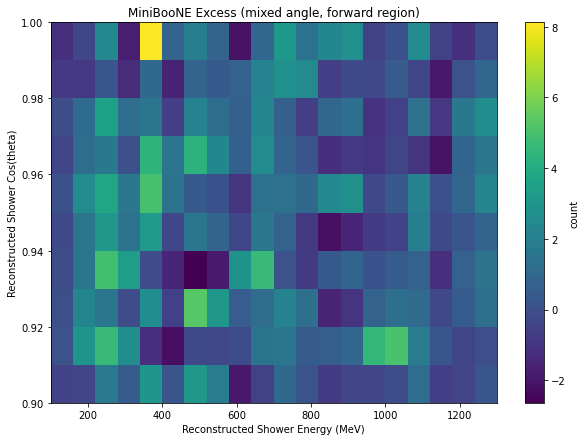

In [13]:
bins = (20, 10)
range_limits = ((100., 1300.), (0.9, 1.))

plt.figure(figsize=(10,7))
plt.hist2d(mixed_bin_centers_energy, mixed_bin_centers_angle, weights=(data_mixed - pred_mixed), bins=bins, range=range_limits)
plt.colorbar(label="count")
plt.title("MiniBooNE Excess (mixed angle, forward region)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_mixed_forward.png", facecolor="white")

plt.show()

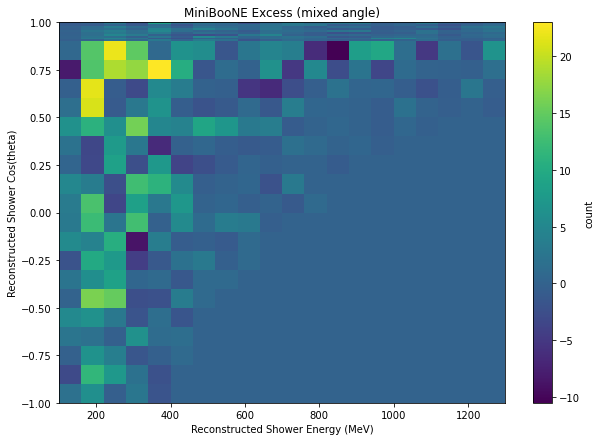

In [14]:
bins = (
    [100 + i * 60 for i in range(21)],
    (-1., -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
     0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.)
)
range_limits = ((100., 1300.), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(mixed_bin_centers_energy, mixed_bin_centers_angle, weights=(data_mixed - pred_mixed), bins=bins, range=range_limits)
plt.colorbar(label="count")
plt.title("MiniBooNE Excess (mixed angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_mixed_count.png", facecolor="white")

plt.show()

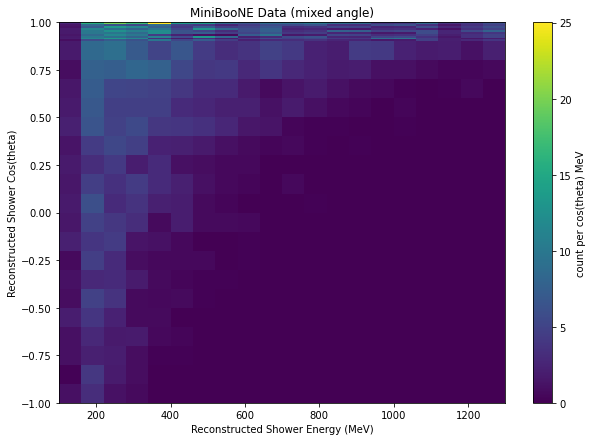

In [15]:
bins = (
    [100 + i * 60 for i in range(21)],
    (-1., -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
     0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.)
)
range_limits = ((100., 1300.), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(mixed_bin_centers_energy, mixed_bin_centers_angle, weights=data_mixed / bin_size_mixed, bins=bins, range=range_limits)
plt.colorbar(label="count per cos(theta) MeV")
plt.title("MiniBooNE Data (mixed angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_data_mixed.png", facecolor="white")

plt.show()

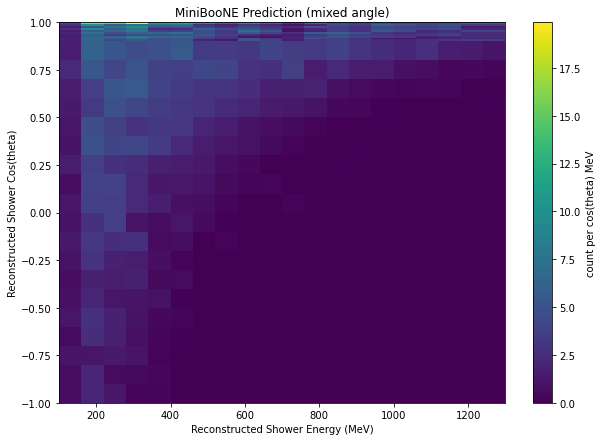

In [16]:
bins = (
    [100 + i * 60 for i in range(21)],
    (-1., -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
     0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.)
)
range_limits = ((100., 1300.), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(mixed_bin_centers_energy, mixed_bin_centers_angle, weights=pred_mixed / bin_size_mixed, bins=bins, range=range_limits)
plt.colorbar(label="count per cos(theta) MeV")
plt.title("MiniBooNE Prediction (mixed angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_pred_mixed.png", facecolor="white")

plt.show()


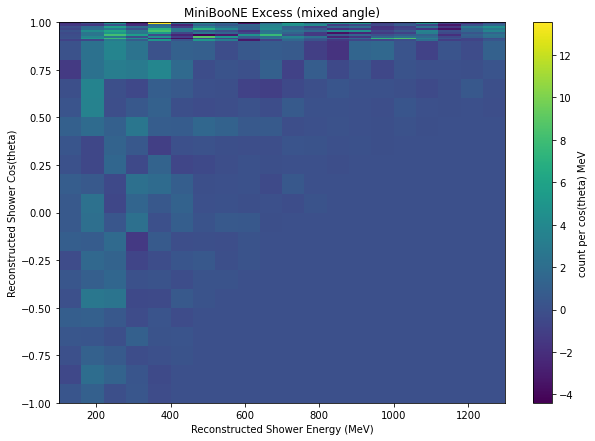

In [17]:
bins = (
    [100 + i * 60 for i in range(21)],
    (-1., -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
     0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.)
)
range_limits = ((100., 1300.), (-1., 1.))

plt.figure(figsize=(10,7))
plt.hist2d(mixed_bin_centers_energy, mixed_bin_centers_angle, weights=(data_mixed - pred_mixed) / bin_size_mixed, bins=bins, range=range_limits)
plt.colorbar(label="count per cos(theta) MeV")
plt.title("MiniBooNE Excess (mixed angle)")
plt.xlabel("Reconstructed Shower Energy (MeV)")
plt.ylabel("Reconstructed Shower Cos(theta)")
plt.savefig(f"plots/miniboone_excess_mixed.png", facecolor="white")

plt.show()